In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
xl = pd.ExcelFile("Graficos Digitalizados.xlsx")
sheets = xl.sheet_names

sheets
# ['Fosforo - G1',
#  'pH - G1',
#  'DBO - G4',
#  'N - G4',
#  'Temperatura - G5',
#  'Turbidez - G3',
#  'Residuos - G2',
#  'OD - G2',
#  'Coliformes - G3']
fosforo = xl.parse(sheets[0])
ph = xl.parse(sheets[1])
dbo = xl.parse(sheets[2])
n = xl.parse(sheets[3])
temperatura = xl.parse(sheets[4])
turbidez = xl.parse(sheets[5])
residuos = xl.parse(sheets[6])
od = xl.parse(sheets[7])
coliformes = xl.parse(sheets[8])
print(sheets[8])
coliformes = coliformes.iloc[:, 0:2]
od = od.tail(-1)
od = od.iloc[:, 1:]

cols = [fosforo, ph, dbo, n, temperatura, turbidez, residuos, od, coliformes]
funcs = {}


# i = 0
# for indicador in cols:
#     indicador.rename(columns={indicador.columns[0]: 'x', indicador.columns[1]: 'y'}, inplace=True)
#     indicador = indicador.astype('float64')
#     grau = 100
#     coefficients = np.polyfit(indicador['x'], indicador['y'], grau)
#     func = np.poly1d(coefficients)
#     funcs[sheets[i]] = func


#     i += 1

Coliformes - G3


In [78]:
import numpy as np

coliformes.rename(columns={coliformes.columns[0]: 'x', coliformes.columns[1]: 'y'}, inplace=True)
coliformes = coliformes.astype('float64')

grau = 100
coliformes
# coefficients = np.polyfit(coliformes['x'], coliformes['y'], grau)
# coliformes_func = np.poly1d(coefficients)

# plt.scatter(coliformes['x'], coliformes['y'], label='Data')
# plt.plot(coliformes['x'], coliformes_func(coliformes['x']), color='r', label='Fitted curve')
# plt.legend()
# plt.show()

/home/andre/.local/lib/python3.10/site-packages/numpy/lib/twodim_base.py:632: RuntimeWarning: overflow encountered in accumulate
  multiply.accumulate(tmp[:, 1:], out=tmp[:, 1:], axis=1)
/home/andre/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/andre/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an exception set

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


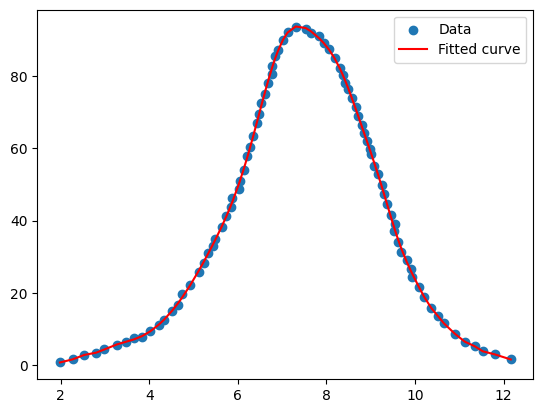

In [7]:
ph.rename(columns={ph.columns[0]: 'x', ph.columns[1]: 'y'}, inplace=True)
grau = 100
coefficients = np.polyfit(ph['x'], ph['y'], grau)
ph_func = np.poly1d(coefficients)

plt.scatter(ph['x'], ph['y'], label='Data')
plt.plot(ph['x'], ph_func(ph['x']), color='r', label='Fitted curve')
plt.legend()
plt.show()

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


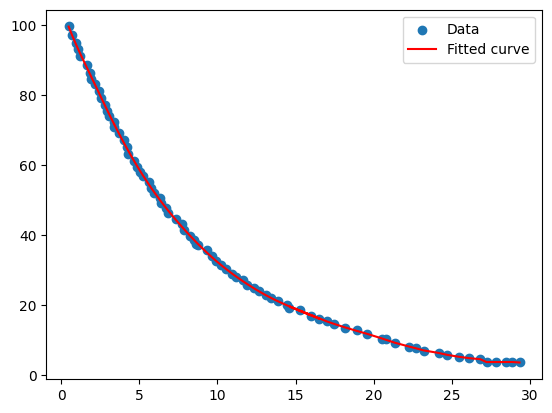

In [8]:
dbo.rename(columns={dbo.columns[0]: 'x', dbo.columns[1]: 'y'}, inplace=True)
grau = 100
coefficients = np.polyfit(dbo['x'], dbo['y'], grau)
dbo_func = np.poly1d(coefficients)

plt.scatter(dbo['x'], dbo['y'], label='Data')
plt.plot(dbo['x'], dbo_func(dbo['x']), color='r', label='Fitted curve')
plt.legend()
plt.show()

/home/andre/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


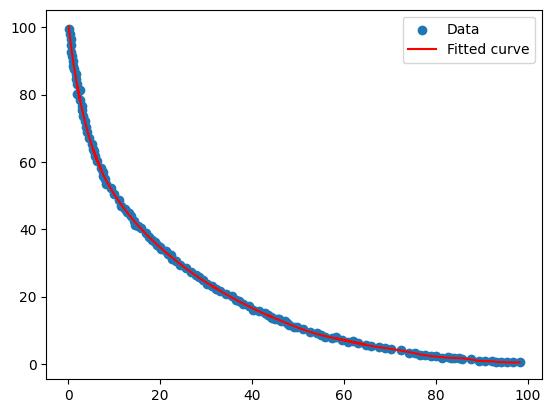

In [9]:
n.rename(columns={n.columns[0]: 'x', n.columns[1]: 'y'}, inplace=True)
grau = 100
coefficients = np.polyfit(n['x'], n['y'], grau)
n_func = np.poly1d(coefficients)

plt.scatter(n['x'], n['y'], label='Data')
plt.plot(n['x'], n_func(n['x']), color='r', label='Fitted curve')
plt.legend()
plt.show()

/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


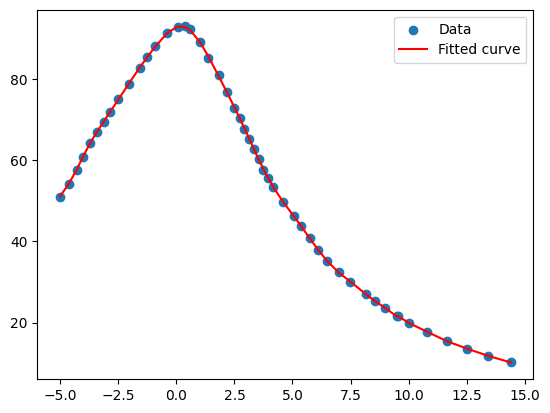

In [10]:
temperatura.rename(columns={temperatura.columns[0]: 'x', temperatura.columns[1]: 'y'}, inplace=True)
grau = 100
coefficients = np.polyfit(temperatura['x'], temperatura['y'], grau)
temperatura_func = np.poly1d(coefficients)

plt.scatter(temperatura['x'], temperatura['y'], label='Data')
plt.plot(temperatura['x'], temperatura_func(temperatura['x']), color='r', label='Fitted curve')
plt.legend()
plt.show()

/home/andre/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/andre/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


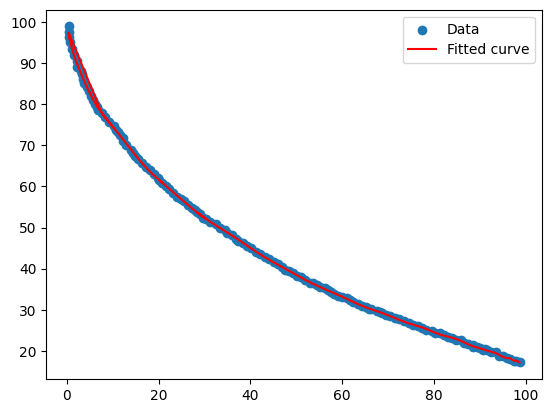

In [11]:
turbidez.rename(columns={turbidez.columns[0]: 'x', turbidez.columns[1]: 'y'}, inplace=True)
grau = 100
coefficients = np.polyfit(turbidez['x'], turbidez['y'], grau)
turbidez_func = np.poly1d(coefficients)

plt.scatter(turbidez['x'], turbidez['y'], label='Data')
plt.plot(turbidez['x'], turbidez_func(turbidez['x']), color='r', label='Fitted curve')
plt.legend()
plt.show()